In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def lost_function(a, b, x_arr, y_arr):
    """
    calculates lost function based as sum of squared errors
    we need to minimize the "sum of squared errors"
    this is to see how far we from correct value
    :return: total error
    """
    return np.sum((y_arr - (a * x_arr + b)) ** 2) / float(len(x_arr))


def step_gradient(a_current, b_current, x_arr, y_arr, learning_rate):
    """
    on step of gradient descent
    :return: new value of a and b
    """
    num_of_points = float(len(x_arr))

    # Partial derivative of lost function by a
    a_gradient = np.sum(-(2 / num_of_points) * x_arr * (y_arr - (a_current * x_arr + b_current)))
    # Partial derivative of lost function by b
    b_gradient = np.sum(-(2 / num_of_points) * (y_arr - (a_current * x_arr + b_current)))

    # Minus because we actually need move in direction of antigradient (- grad) to minimize lost function
    new_a = a_current - (learning_rate * a_gradient)
    new_b = b_current - (learning_rate * b_gradient)

    return [new_a, new_b]


def gradient_descent_runner(x_arr, y_arr, starting_a, starting_b, learning_rate, num_iterations):
    a = starting_a
    b = starting_b

    for i in range(num_iterations):
        a, b = step_gradient(a, b, x_arr, y_arr, learning_rate)

    return [a, b]

In [3]:
# init sample
sample_size = 100

x_sample = np.random.rand(sample_size)

a_real = 2.5
b_real = 1.6

noise_arr = np.random.random_sample(sample_size)
y_sample = a_real * x_sample + b_real + noise_arr

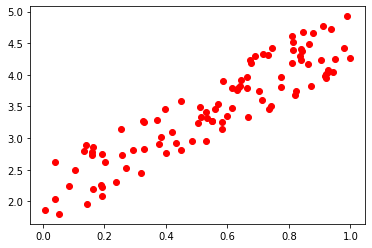

In [4]:
plt.plot(x_sample, y_sample, 'ro')
plt.show()

In [5]:
 # hyperparameters
lr = 0.01  # how fast the data converge

# initial guesses
initial_a = 0
initial_b = 0

iter_num = 10000

In [6]:
[a_found, b_found] = gradient_descent_runner(x_sample, y_sample, initial_a, initial_b, lr, iter_num)

In [8]:
"After {0} iterations a = {1}, b = {2}, error = {3}".format(iter_num, a_found, b_found,
                  lost_function(a_found, b_found, x_sample, y_sample))

'After 10000 iterations a = 2.4939781897468274, b = 2.079811537824962, error = 0.09412376540455357'

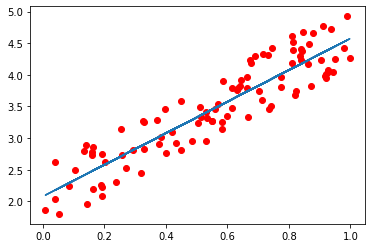

In [9]:
plt.plot(x_sample, y_sample, 'ro')
y_predicted = a_found * x_sample + b_found
plt.plot(x_sample, y_predicted)
plt.show()